In [10]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3
sns.set()
import sklearn


In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
SVM = SVC(kernel='rbf', random_state=12, C=8)
LR = LogisticRegression()

scores = cross_val_score(SVM, cancer.data, cancer.target, cv = 10)
print('Cross validation scores : {}'.format(scores))
print('Cross validation scores : {:.3f} +- {:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores : [0.877 0.877 0.895 0.947 0.947 0.877 0.965 0.93  0.93  0.946]
Cross validation scores : 0.919 +- 0.032


최고 점수 : 0.94
최고 점수에서의 하이퍼파라미터(gamma, C) : (0.001, 1.0)


<AxesSubplot:>

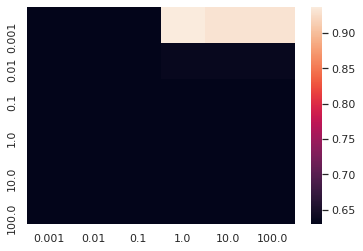

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=12)

scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, Y_train)
        scores[(gamma, C)] = svm.score(X_test, Y_test)
        
scores = pd.Series(scores)

print('최고 점수 : {:.2f}'.format(scores.max()))
print('최고 점수에서의 하이퍼파라미터(gamma, C) : {}'.format(scores.idxmax()))

sns.heatmap(scores.unstack())

In [19]:
from sklearn.model_selection import GridSearchCV

param_SVM_grid = { 'C' : np.logspace(-3, 2, num=6),
                         'gamma' : np.logspace(-3, 2, num=6)}
param_TREE_grid = {'max_depth' : [2,3,4,5,10], 'min_samples_leaf' : [2,3,4,5,10]}
gs = GridSearchCV(estimator=SVC(), param_grid=param_SVM_grid, cv=5)
tree = GridSearchCV(DecisionTreeClassifier(random_state=12,criterion='entropy'), param_grid = param_TREE_grid)

tree.fit(X_train, Y_train)

print('Best cross validation score : {:.3f}'.format(tree.best_score_))
print('Best parameters : {}'.format(tree.best_params_))
print('Test score : {:.3f}'.format(tree.score(X_test,Y_test)))

Best cross validation score : 0.944
Best parameters : {'max_depth': 3, 'min_samples_leaf': 4}
Test score : 0.916
